In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
#drive.mount(‘/content/drive’)


In [63]:
bd = pd.read_csv("broadband.csv")
idf = pd.read_csv("internet.csv")
p_df = pd.read_csv("people.csv")
classdf = pd.read_excel("CLASS.xlsx")

In [64]:
bd.head()

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804


In [65]:
idf.head()

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


In [66]:
p_df.head()

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


In [67]:
classdf.head(5)

,Economy,Code,Region,Income group,Lending category,Other (EMU or HIPC)
0,Aruba,ABW,Latin America & Caribbean,High income,NaN,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,NaN
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN,NaN


In [68]:
p_df.columns

Index(['Entity', 'Code', 'Year', 'Users'], dtype='object')

In [69]:
idf.describe(include='all')

,Entity,Code,Year,Internet_Usage
count,7089,5761,7089.000000,7089.000000
unique,261,214,NaN,NaN
top,Romania,HKG,NaN,NaN
freq,30,30,NaN,NaN
mean,NaN,NaN,2003.858936,20.969479
std,NaN,NaN,8.339364,27.488015
min,NaN,NaN,1990.000000,0.000000
25%,NaN,NaN,1997.000000,0.158150
50%,NaN,NaN,2004.000000,6.000000
75%,NaN,NaN,2011.000000,36.000000


In [70]:
internetTop5 = idf[idf['Year']==2019]
internetTop5 = internetTop5.groupby('Entity')['Internet_Usage'].sum().sort_values(ascending = False)

In [71]:
internetTop5 = internetTop5.head(5)
internetTop5

Entity
Bahrain                 99.701504
Qatar                   99.652804
Kuwait                  99.542676
United Arab Emirates    99.149998
Denmark                 98.046435
Name: Internet_Usage, dtype: float64

2. How many people had internet access in those countries in 2019?

In [72]:
internet_access_2019 = p_df[p_df['Entity'].isin(internetTop5.index)]

In [73]:
internet_access_2019 = internet_access_2019[internet_access_2019['Year'] == 2019].sort_values(ascending=False,by='Users')

In [74]:
internet_access_2019.head(5)

,Entity,Code,Year,Users
5986,United Arab Emirates,ARE,2019,9133361
1565,Denmark,DNK,2019,5682653
3091,Kuwait,KWT,2019,4420795
4728,Qatar,QAT,2019,2797495
477,Bahrain,BHR,2019,1489735


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


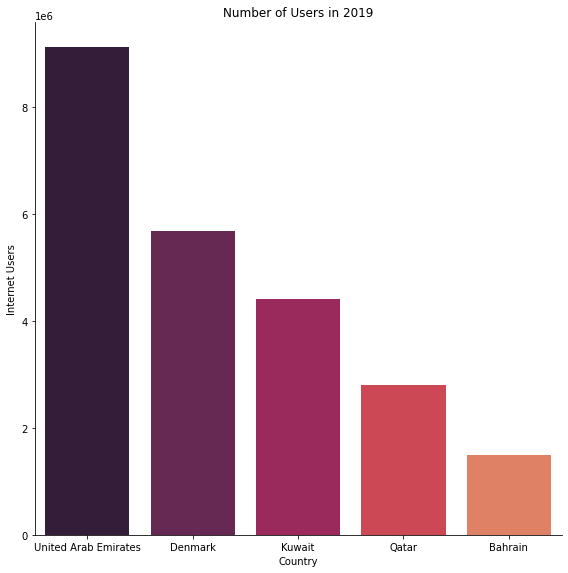

In [117]:
sns.catplot(data=internet_access_2019,x="Entity",y='Users',kind='bar',size=8).set(ylabel="Internet Users",xlabel="Country",title="Number of Users in 2019")
plt.savefig("Top5bar.png", format="png", dpi=600)
plt.show()

In [76]:
classdf['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America', nan], dtype=object)

The regions given are :- 'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'

We have all the regions we need from the given class xlsx file.

In [77]:
south_asia = list(classdf[classdf['Region'] == 'South Asia']['Economy'])
lAmerica_Caribbean = list(classdf[classdf['Region'] == 'Latin America & Caribbean']['Economy'])
europe_central_asia = list(classdf[classdf['Region'] == 'Europe & Central Asia']['Economy'])
east_asia_pacific = list(classdf[classdf['Region'] == 'East Asia & Pacific']['Economy'])
middle_east_north_africa = list(classdf[classdf['Region'] == 'Middle East & North Africa']['Economy'])
north_america = list(classdf[classdf['Region'] == 'North America']['Economy'])

In [78]:
print(south_asia,lAmerica_Caribbean,europe_central_asia,east_asia_pacific,middle_east_north_africa,north_america)

['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Sri Lanka', 'Maldives', 'Nepal', 'Pakistan'] ['Aruba', 'Argentina', 'Antigua and Barbuda', 'Bahamas, The', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Dominica', 'Dominican Republic', 'Ecuador', 'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Haiti', 'Jamaica', 'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)', 'Mexico', 'Nicaragua', 'Panama', 'Peru', 'Puerto Rico', 'Paraguay', 'El Salvador', 'Suriname', 'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'Trinidad and Tobago', 'Uruguay', 'St. Vincent and the Grenadines', 'Venezuela, RB', 'British Virgin Islands', 'Virgin Islands (U.S.)'] ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Switzerland', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'Faroe Islands', 'Uni

In [115]:
sa_i_a = idf[idf['Entity'].isin(south_asia)].groupby('Entity')
sa_i_ax = sa_i_a.apply(lambda x : x[x['Year']==2017])
print(sa_i_ax.sort_values(ascending=False,by='Internet_Usage')[['Entity','Internet_Usage']].reset_index(drop=True))
print(len(sa_i_ax))
top_5_sa = sa_i_ax.sort_values(ascending=False,by='Internet_Usage').head(5)
top_5_sa

        Entity  Internet_Usage
0     Maldives       63.185666
1    Sri Lanka       34.113348
2        India       32.000000
3        Nepal       21.403510
4     Pakistan       17.105146
5  Afghanistan       11.447688
6


,,Entity,Code,Year,Internet_Usage
Entity,,,,,
Maldives,4052,Maldives,MDV,2017,63.185666
Sri Lanka,6110,Sri Lanka,LKA,2017,34.113348
India,3044,India,IND,2017,32.000000
Nepal,4607,Nepal,NPL,2017,21.403510
Pakistan,5032,Pakistan,PAK,2017,17.105146


In [113]:
mena = idf[idf['Entity'].isin(middle_east_north_africa)].groupby('Entity')
menax = mena.apply(lambda x : x[x['Year']==2017])
print(menax.sort_values(ascending=False,by='Internet_Usage')[['Entity','Internet_Usage']].reset_index(drop=True))
print(len(menax))
top_5_mena = menax.sort_values(ascending=False,by='Internet_Usage').head(5)
top_5_mena

                  Entity  Internet_Usage
0                 Kuwait       97.999989
1                  Qatar       97.388849
2                Bahrain       95.878136
3   United Arab Emirates       94.819923
4           Saudi Arabia       94.175600
5                 Israel       81.581184
6                  Malta       81.011911
7                   Oman       80.185636
8                Lebanon       78.180775
9                 Jordan       66.790314
10               Morocco       61.762212
11              Djibouti       55.681409
12               Tunisia       55.500155
13                  Iraq       49.359999
14               Algeria       47.691055
15                 Libya       21.758921
16


,,Entity,Code,Year,Internet_Usage
Entity,,,,,
Kuwait,3414,Kuwait,KWT,2017,97.999989
Qatar,5386,Qatar,QAT,2017,97.388849
Bahrain,468,Bahrain,BHR,2017,95.878136
United Arab Emirates,6714,United Arab Emirates,ARE,2017,94.819923
Saudi Arabia,5659,Saudi Arabia,SAU,2017,94.175600


In [112]:
lmc = idf[idf['Entity'].isin(lAmerica_Caribbean)].groupby('Entity')
lmcx = lmc.apply(lambda x : x[x['Year']==2017])
print(lmcx.sort_values(ascending=False,by='Internet_Usage')[['Entity','Internet_Usage']].reset_index(drop=True))
print(len(lmcx))
top_5_lmc = lmcx.sort_values(ascending=False,by='Internet_Usage').head(5)
top_5_lmc

                    Entity  Internet_Usage
0                    Aruba       97.170000
1                    Chile       82.327487
2                 Barbados       81.760778
3           Cayman Islands       81.067693
4   British Virgin Islands       77.704268
5      Trinidad and Tobago       77.326053
6                Argentina       74.294907
7               Costa Rica       71.581665
8                  Uruguay       70.322354
9                 Dominica       69.619669
10             Puerto Rico       68.740773
11      Dominican Republic       67.571245
12                  Brazil       67.471285
13                  Mexico       63.852249
14                Colombia       62.259880
15                Paraguay       61.075756
16                  Panama       59.950631
17                 Grenada       59.071735
18                    Cuba       57.148404
19                 Jamaica       55.072067
20                    Peru       50.450412
21                Suriname       48.945174
22         

,,Entity,Code,Year,Internet_Usage
Entity,,,,,
Aruba,330,Aruba,ABW,2017,97.170000
Chile,1201,Chile,CHL,2017,82.327487
Barbados,524,Barbados,BRB,2017,81.760778
Cayman Islands,1088,Cayman Islands,CYM,2017,81.067693
British Virgin Islands,816,British Virgin Islands,VGB,2017,77.704268


In [111]:
eca = idf[idf['Entity'].isin(europe_central_asia)].groupby('Entity')
ecax = eca.apply(lambda x : x[x['Year']==2017])
print(ecax.sort_values(ascending=False,by='Internet_Usage')[['Entity','Internet_Usage']].reset_index(drop=True))
print(len(ecax))
top_5_eca = ecax.sort_values(ascending=False,by='Internet_Usage').head(5)
top_5_eca

                    Entity  Internet_Usage
0            Liechtenstein       99.546612
1                  Iceland       98.255201
2               Luxembourg       97.362960
3                  Denmark       97.099362
4                   Monaco       97.052977
5                   Norway       96.357601
6              Netherlands       93.197279
7                   Sweden       93.006267
8                  Andorra       91.567467
9           United Kingdom       90.424550
10             Switzerland       89.686148
11                 Estonia       88.102457
12                 Austria       87.935587
13                 Belgium       87.679681
14                 Finland       87.468929
15                   Spain       84.602246
16                 Germany       84.394154
17                 Ireland       84.114007
18                  Kosovo       83.893597
19                  Cyprus       80.743189
20                  France       80.502460
21                  Latvia       80.114077
22         

,,Entity,Code,Year,Internet_Usage
Entity,,,,,
Liechtenstein,3767,Liechtenstein,LIE,2017,99.546612
Iceland,3015,Iceland,ISL,2017,98.255201
Luxembourg,3909,Luxembourg,LUX,2017,97.362960
Denmark,1550,Denmark,DNK,2017,97.099362
Monaco,4418,Monaco,MCO,2017,97.052977


In [83]:
eap = idf[idf['Entity'].isin(east_asia_pacific)].groupby('Entity')
eapx = eap.apply(lambda x : x[x['Year']==2017])
print(eapx.sort_values(ascending=False,by='Internet_Usage'))
print(len(eapx))
top_5_eap = eapx.sort_values(ascending=False,by='Internet_Usage').head(5)
top_5_eap

                                 Entity Code  Year  Internet_Usage
Entity                                                            
Japan            3270             Japan  JPN  2017       91.726547
New Zealand      4692       New Zealand  NZL  2017       90.811093
Australia        355          Australia  AUS  2017       86.545049
Singapore        5788         Singapore  SGP  2017       84.452268
New Caledonia    4664     New Caledonia  NCL  2017       82.005841
Guam             2571              Guam  GUM  2017       80.505466
Malaysia         4022          Malaysia  MYS  2017       80.140479
French Polynesia 2290  French Polynesia  PYF  2017       72.703895
Nauru            4579             Nauru  NRU  2017       62.385125
Philippines      5214       Philippines  PHL  2017       60.054760
Vietnam          6974           Vietnam  VNM  2017       58.140000
China            1229             China  CHN  2017       54.300000
Thailand         6412          Thailand  THA  2017       52.89

,,Entity,Code,Year,Internet_Usage
Entity,,,,,
Japan,3270,Japan,JPN,2017,91.726547
New Zealand,4692,New Zealand,NZL,2017,90.811093
Australia,355,Australia,AUS,2017,86.545049
Singapore,5788,Singapore,SGP,2017,84.452268
New Caledonia,4664,New Caledonia,NCL,2017,82.005841


In [114]:
na = idf[idf['Entity'].isin(north_america)].groupby('Entity')
nax = na.apply(lambda x : x[x['Year']==2017])
print(nax.sort_values(ascending=False,by='Internet_Usage'))
print(len(nax))
top_5_na = nax.sort_values(ascending=False,by='Internet_Usage').head(5)
top_5_na

                           Entity Code  Year  Internet_Usage
Entity                                                      
Bermuda       663         Bermuda  BMU  2017       98.370000
Canada        1014         Canada  CAN  2017       92.701372
United States 6774  United States  USA  2017       87.274889
3


,,Entity,Code,Year,Internet_Usage
Entity,,,,,
Bermuda,663,Bermuda,BMU,2017,98.370000
Canada,1014,Canada,CAN,2017,92.701372
United States,6774,United States,USA,2017,87.274889


In [85]:
top5sa = idf[idf['Entity'].isin(top_5_sa['Entity'])]
top5mena = idf[idf['Entity'].isin(top_5_mena['Entity'])]
top5lmc = idf[idf['Entity'].isin(top_5_lmc['Entity'])]
top5eca = idf[idf['Entity'].isin(top_5_eca['Entity'])]
top5eap = idf[idf['Entity'].isin(top_5_eap['Entity'])]
top5na = idf[idf['Entity'].isin(top_5_na['Entity'])]

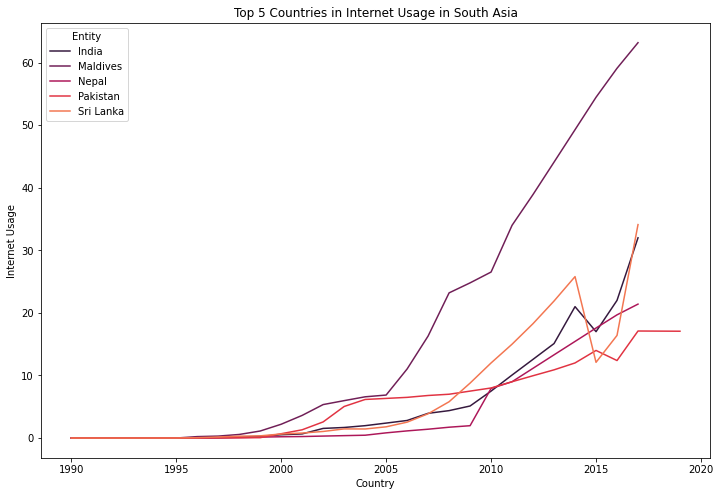

In [86]:
def drawMultiLineGraphTop5(data_r,regionName,palette='rocket'):
  fig, ax = plt.subplots(figsize=(12, 8 ))
  sns.set_palette(palette)
  sns.lineplot(x = "Year", y = "Internet_Usage", data = data_r, hue = "Entity", style = "Entity", dashes = False,  legend="brief",ax=ax).set(ylabel="Internet Usage",xlabel="Country",title="Top 5 Countries in Internet Usage in "+regionName)
  plt.savefig("Top5"+regionName+".png", format="png", dpi=600)
  plt.show()

drawMultiLineGraphTop5(top5sa,"South Asia")

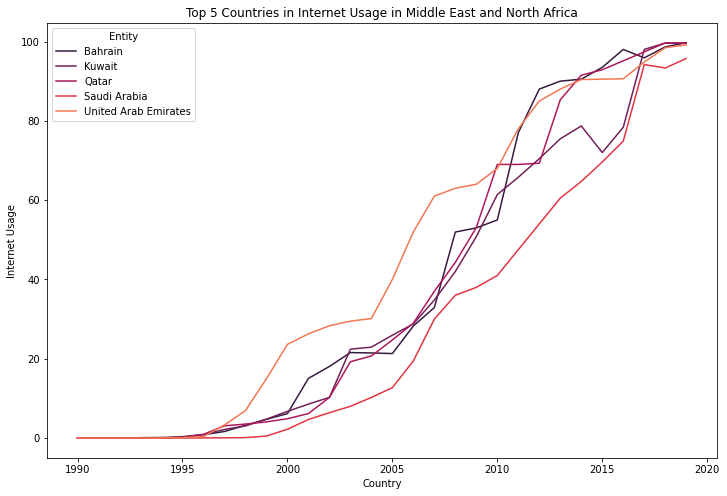

In [87]:
drawMultiLineGraphTop5(top5mena,"Middle East and North Africa")

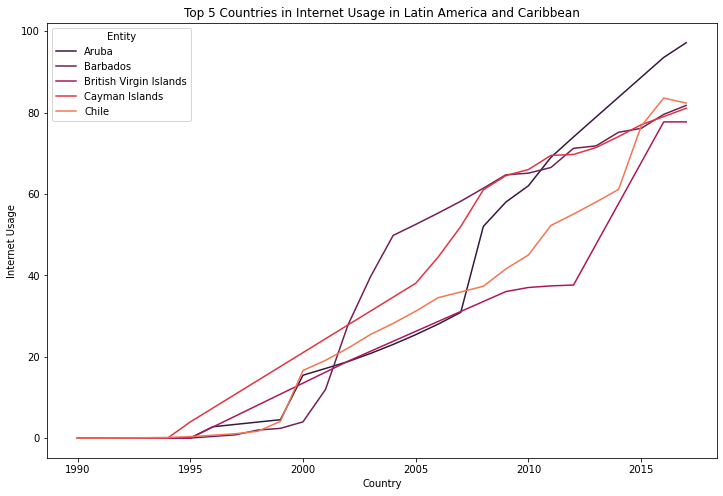

In [88]:
drawMultiLineGraphTop5(top5lmc,"Latin America and Caribbean")

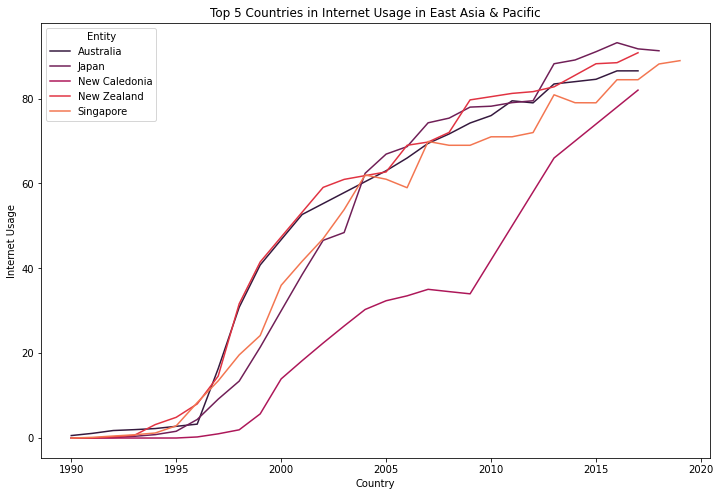

In [89]:
drawMultiLineGraphTop5(top5eap,"East Asia & Pacific")

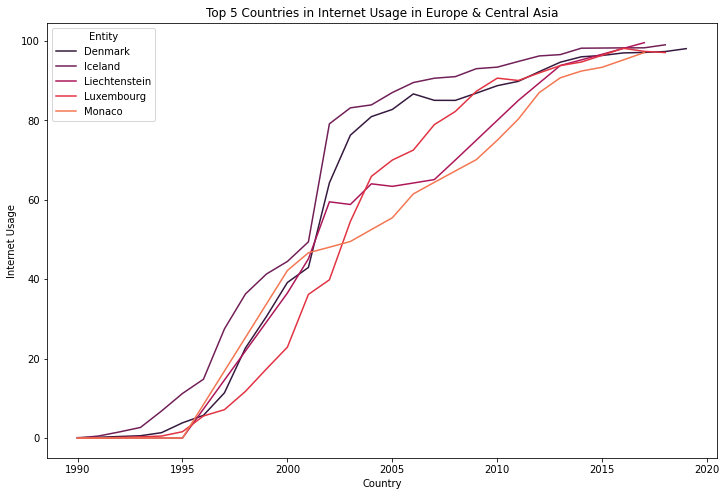

In [90]:
drawMultiLineGraphTop5(top5eca,"Europe & Central Asia")

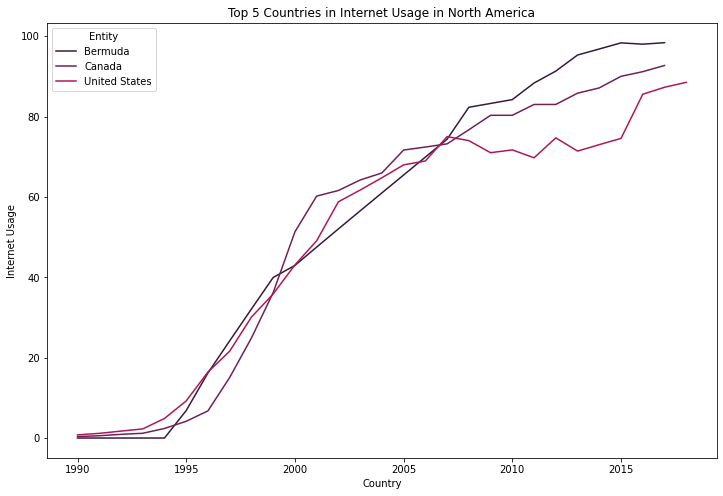

In [91]:
drawMultiLineGraphTop5(top5na,"North America")

In [92]:
iT5 = pd.DataFrame(internetTop5.index,internetTop5).reset_index()
iT5

,Internet_Usage,Entity
0,99.701504,Bahrain
1,99.652804,Qatar
2,99.542676,Kuwait
3,99.149998,United Arab Emirates
4,98.046435,Denmark


In [119]:
otherList = ['World', 'Asia', 'Upper-middle-income countries',  'High-income countries', 'Lower-middle-income countries', 'Europe', 'North America' , 'South America', 'Africa']
top5InternetUsers = p_df[(p_df['Year']==2020)]
top5InternetUsers = top5InternetUsers[~top5InternetUsers['Entity'].isin(otherList)]
top5InternetUsers = top5InternetUsers.groupby('Entity').agg(np.sum).sort_values(ascending=False,by="Users").head(5)
top5InternetUsers['Entity'] = top5InternetUsers.index
top5InternetUsers

,Year,Users,Entity
Entity,,,
China,2020,1003218650,China
India,2020,600446441,India
United States,2020,305371298,United States
Brazil,2020,173419624,Brazil
Indonesia,2020,146059763,Indonesia


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


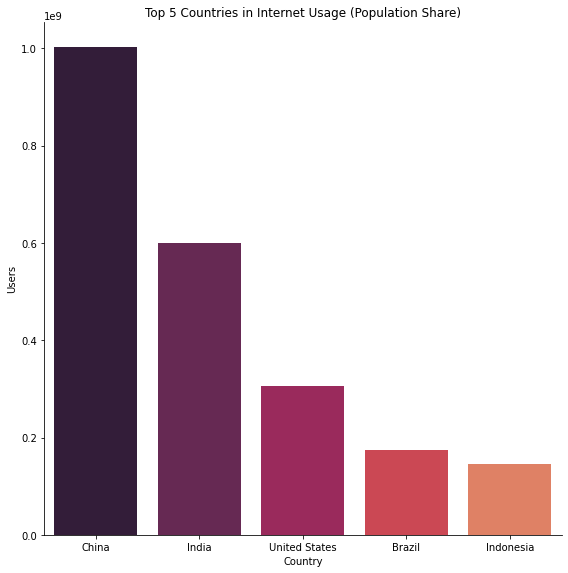

In [121]:
sns.catplot(data=top5InternetUsers,x="Entity",y='Users',kind='bar',size=8).set(xlabel="Country",ylabel="Users",title="Top 5 Countries in Internet Usage (Population Share)")
plt.savefig("Top5Users.png", format="png", dpi=600)
plt.show() 

In [95]:
mergeData = idf.merge(bd)
mergeData = mergeData[mergeData['Year']==2019]

In [96]:
x = mergeData['Internet_Usage']
y = mergeData['Broadband_Subscriptions']
print(round(x.corr(y),2))

0.56


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


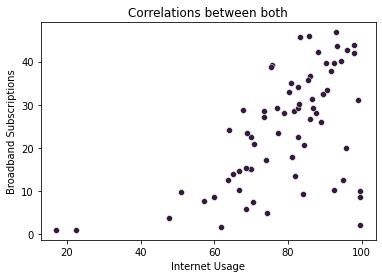

In [97]:
sns.scatterplot(x,y).set(xlabel ="Internet Usage", ylabel = "Broadband Subscriptions", title ='Correlations between both')
plt.savefig("CorrelationWithoutLine.png", format="png", dpi=600)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


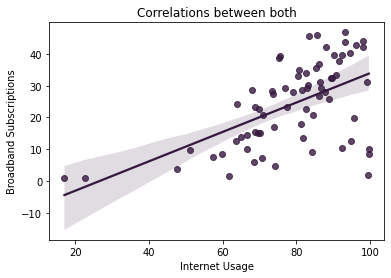

In [98]:
sns.regplot(x,y).set(xlabel ="Internet Usage", ylabel = "Broadband Subscriptions", title ='Correlations between both')
plt.savefig("CorrelationWithLine.png", format="png", dpi=600)
plt.show()